# Machine Learning Models Comparison
## Heart Failure Prediction Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
warnings.filterwarnings("ignore")

In [2]:
heart_data = pd.read_csv('heart.csv')

In [3]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart_data.shape

(918, 12)

In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
heart_data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [9]:
heart_data["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [10]:
heart_data.groupby('HeartDisease').mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049
1,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213


<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

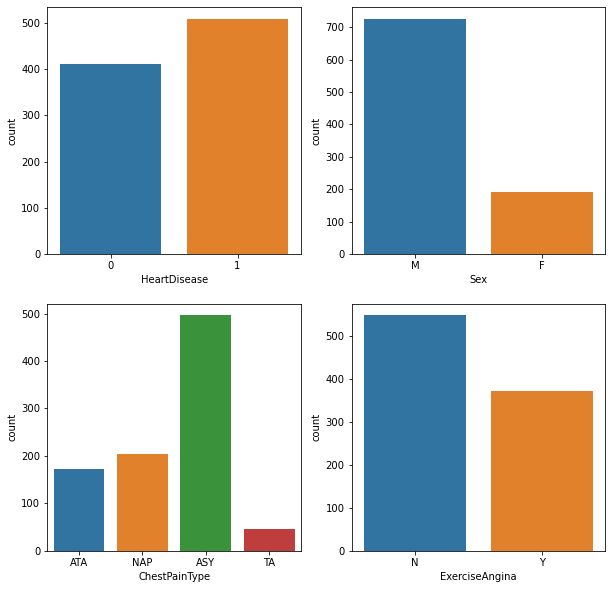

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x=heart_data.HeartDisease)
plt.subplot(2,2,2)
sns.countplot(x=heart_data.Sex)
plt.subplot(2,2,3)
sns.countplot(x=heart_data.ChestPainType)
plt.subplot(2,2,4)
sns.countplot(x=heart_data.ExerciseAngina)

In [12]:
heart_data_df = pd.get_dummies(heart_data, columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
heart_data_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


<AxesSubplot:>

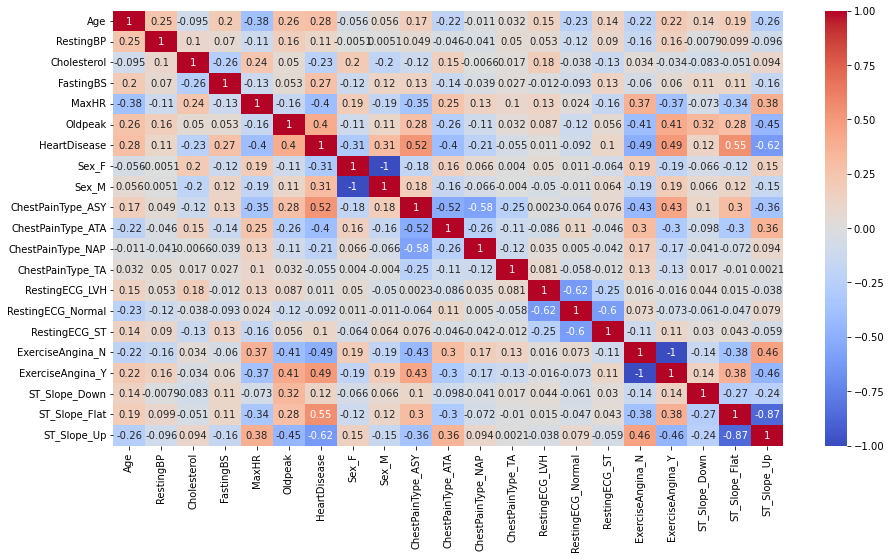

In [13]:
plt.figure(figsize = (15,8))
sns.heatmap(heart_data_df.corr(), annot = True, cmap = "coolwarm")

In [14]:
x = heart_data_df.drop('HeartDisease', axis = 1)
y = heart_data_df['HeartDisease']

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=2)

In [16]:
scaler=StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [17]:
sc_train = scaler.transform(xtrain)
sc_test = scaler.transform(xtest)

### Logistic Regression

In [18]:
lr_model = LogisticRegression()
lr_model.fit(sc_train,ytrain)

LogisticRegression()

In [19]:
ypredict= lr_model.predict(sc_test)

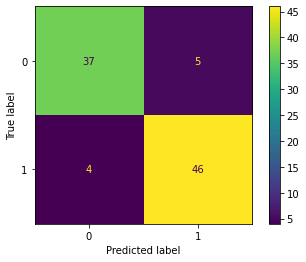

In [20]:
plot_confusion_matrix(lr_model, sc_test, ytest)

In [21]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        42
           1       0.90      0.92      0.91        50

    accuracy                           0.90        92
   macro avg       0.90      0.90      0.90        92
weighted avg       0.90      0.90      0.90        92



In [22]:
lr_acc = accuracy_score(ytest,ypredict)

### KNN

In [23]:
error_rate= []
for i in range(1,40):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(sc_train,ytrain)
    pred_i = knn_model.predict(sc_test)
    error_rate.append(np.mean(pred_i != ytest))

Text(0, 0.5, 'Error Rate')

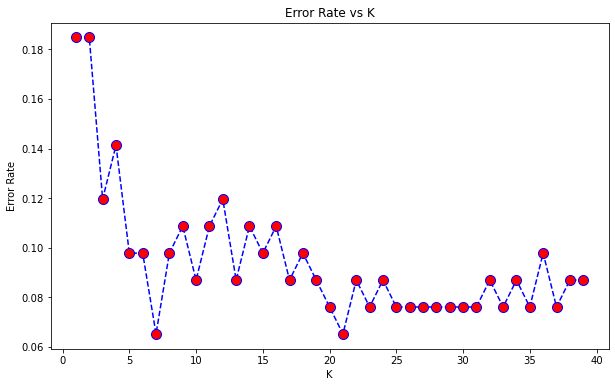

In [24]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [25]:
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(sc_train,ytrain)

KNeighborsClassifier(n_neighbors=7)

In [26]:
ypredict = knn_model.predict(sc_test)

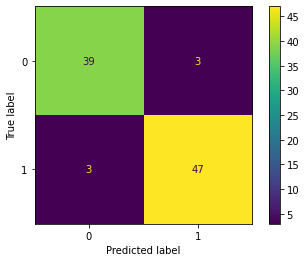

In [27]:
plot_confusion_matrix(knn_model, sc_test, ytest)

In [28]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.94      0.94      0.94        50

    accuracy                           0.93        92
   macro avg       0.93      0.93      0.93        92
weighted avg       0.93      0.93      0.93        92



In [29]:
knn_acc = accuracy_score(ytest, ypredict)

### Random Forest

In [30]:
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(sc_train, ytrain)

RandomForestClassifier()

In [31]:
ypredict = rf_model.predict(sc_test)

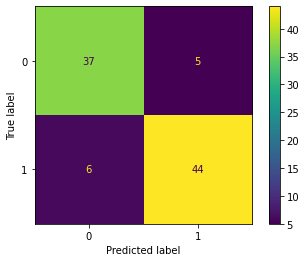

In [32]:
plot_confusion_matrix(rf_model, sc_test, ytest)

In [33]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        42
           1       0.90      0.88      0.89        50

    accuracy                           0.88        92
   macro avg       0.88      0.88      0.88        92
weighted avg       0.88      0.88      0.88        92



In [34]:
rf_acc = accuracy_score(ytest, ypredict)

### SVC

In [35]:
svc_model = SVC(kernel = 'rbf')
svc_model.fit(sc_train, ytrain)

SVC()

In [36]:
ypredict = svc_model.predict(sc_test)

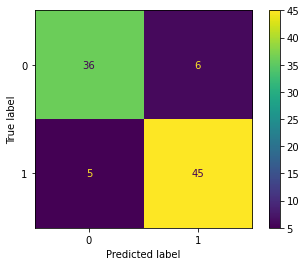

In [37]:
plot_confusion_matrix(svc_model, sc_test, ytest)

In [38]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        42
           1       0.88      0.90      0.89        50

    accuracy                           0.88        92
   macro avg       0.88      0.88      0.88        92
weighted avg       0.88      0.88      0.88        92



In [39]:
svc_acc = accuracy_score(ytest,ypredict)

### Comparing Accuracies

In [40]:
accuracy_scores = []
accuracy_scores.append(lr_acc)
accuracy_scores.append(knn_acc)
accuracy_scores.append(rf_acc)
accuracy_scores.append(svc_acc)

In [41]:
result=pd.DataFrame(accuracy_scores,index=['Logistic Regression','KNN','Random Forest','SVC'],columns=['Accuracy'])
result

,Accuracy
Logistic Regression,0.902174
KNN,0.934783
Random Forest,0.880435
SVC,0.880435


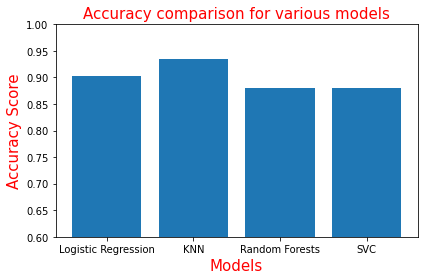

In [42]:
plt.bar(['Logistic Regression', 'KNN', 'Random Forests', 'SVC'], accuracy_scores)
plt.ylim(0.6,1)
plt.title('Accuracy comparison for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=15, color='r')
plt.ylabel('Accuracy Score', fontsize=15, color='r')
plt.tight_layout()
plt.show()

KNN has the highest accuracy